1 Trace(s) in Stream:
IC.KMI.00.BHE | 2000-01-01T05:24:35.335051Z - 2000-01-01T06:24:35.285051Z | 20.0 Hz, 72000 samples


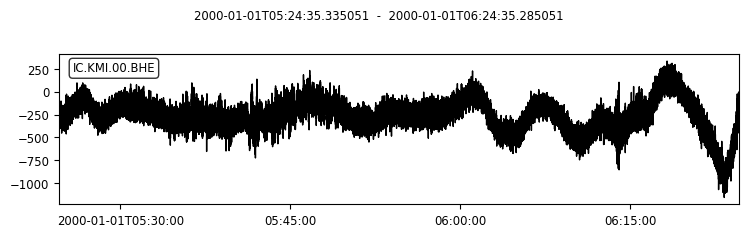

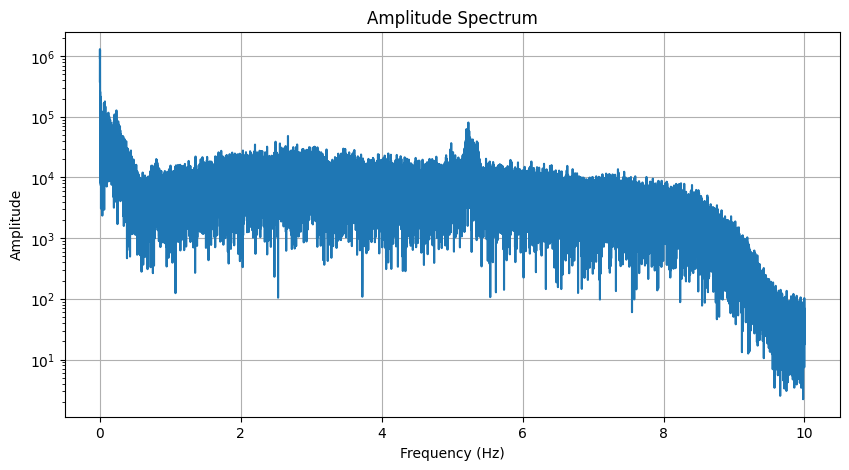

In [7]:
from obspy import read
import matplotlib.pyplot as plt
import numpy as np

# Load the MiniSEED file
stream = read('IC.KMI.00.BHE.mseed')

print(stream)

trace = stream[0]
data = trace.data
data_detrended = data - np.mean(data)
window = np.hanning(len(data_detrended))
data_windowed = data_detrended * window
fft_result = np.fft.fft(data_windowed)

sampling_rate = trace.stats.sampling_rate
n = len(data)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

trace.plot()

magnitudes = np.abs(fft_result)
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies[:n // 2], magnitudes[:n // 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.grid(True)
plt.show()